In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import math
import numpy as np
import os
import cv2
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from CustomDataset import CustomDataset
import matplotlib.pyplot as plt

In [7]:
dataset = CustomDataset(target_type = 'poly')
torch.manual_seed(0)
TRAIN_SIZE= math.floor(dataset.__len__()*0.75)
TEST_SIZE = dataset.__len__() - TRAIN_SIZE
trainset, testset = random_split(dataset,[TRAIN_SIZE,TEST_SIZE])


traindata_loader = DataLoader(trainset, batch_size=5, shuffle=True)
testdata_loader = DataLoader(testset, batch_size=5, shuffle=True)

In [8]:
# Evaluate
model = torchvision.models.segmentation.fcn_resnet50(pretrained=True)
model.classifier[4] = nn.Conv2d(512, 2, kernel_size=(1, 1), stride=(1, 1))
model.load_state_dict(torch.load('models/pytorch/weights_.h5'))
model.eval();


In [9]:
def evaluate():
    running_loss = 0
    total_test = 0
    correct_test = 0
    model.eval();
    for batch, (t_image, mask) in enumerate(testdata_loader):
        outputs = model(t_image)["out"] # forward
        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        #print(mask.shape, predicted.shape)
        total_test+= mask.nelement()
        correct_test += predicted.eq(mask.data).sum().item()
        #print(correct_test, total_test)
        #print("Total_test: ", total_test, "Correct_test: ", correct_test)
        test_accuracy = 100 * correct_test / total_test
        #avg_accuracy = train_accuracy / len(train_loader)
    avg_acc = test_accuracy / TRAIN_SIZE
    print("test Accuracy: %d %%" % (test_accuracy))
#evaluate()

0


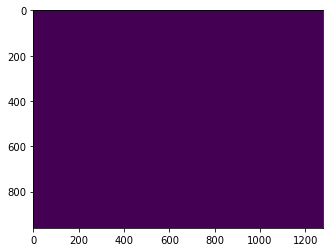

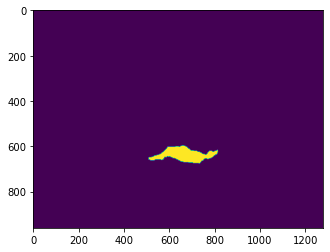

In [11]:
def plot_images_eval(n, DataLoader = testdata_loader):
    for batch, (t_image, mask) in enumerate(DataLoader):
        outputs = model(t_image)["out"] # forward
        _, predicted = torch.max(outputs.data, 1)
        plt1 = plt.figure()
        plt1 = plt.imshow(predicted[0])
        plt2 = plt.figure()
        plt2 = plt.imshow(mask.data[0])
        print(batch)
        if batch+1 == n:
            break
plot_images_eval(1,traindata_loader)